In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
data_pepsi = pd.read_csv("../databases/PEPSIR_raw_LF_perfect.csv", sep=";")
display(data_pepsi.head())
#data_pepsi = data_pepsi.loc[data_pepsi['Q']>100]

data_hydro = pd.read_csv("../databases/HYDROSWOT_100m_V3.csv", sep=";")
display(data_hydro.head())

data_hydro = data_hydro.loc[data_hydro['Q']>100]

print('Hydro -> Missing Data : ',data_hydro.isna().sum().sum(), '  Shape is : ', data_hydro.shape)

print('Pepsi -> Missing Data : ',data_pepsi.isna().sum().sum(), '  Shape is : ', data_pepsi.shape)

,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


,site_no,station_name,river,stream_type,lon,lat,flowacc,stage,W,dH,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.527048,125.8824,0.999744,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,76.172317
1,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,8.909304,152.0952,8.382000,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,1486.634446
2,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.271016,116.4336,0.743712,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,46.156460
3,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.752344,112.1664,2.225040,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,150.645624
4,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.173224,120.3960,1.645920,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,140.168391


Hydro -> Missing Data :  17   Shape is :  (12222, 41)
Pepsi -> Missing Data :  0   Shape is :  (55525, 21)


In [3]:
river_means_pepsi=data_pepsi.groupby("river", as_index=False).mean()
river_medians_pepsi=data_pepsi.groupby("river", as_index=False).median()

In [4]:
display(data_pepsi.head())

,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


In [5]:
print(river_means_pepsi.river[river_means_pepsi['Q']>10000])
river_means_pepsi['Q'].describe()

5                    Jamuna
8     MississippiDownstream
21                    Padma
Name: river, dtype: object


count       29.000000
mean      3930.440983
std       6850.380846
min        155.776433
25%        476.913578
50%       1033.050154
75%       3830.904487
max      30017.042700
Name: Q, dtype: float64

In [6]:
print("Hydro : \n" , data_hydro['Q'].describe(),'\n')
print("Pepsi : \n" , data_pepsi['Q'].describe(),'\n')

Hydro : 
 count    12222.000000
mean      1523.568067
std       3341.338780
min        100.241637
25%        227.101110
50%        524.169324
75%       1194.970926
max      40661.082301
Name: Q, dtype: float64 

Pepsi : 
 count     55525.000000
mean       3039.082415
std        8255.129850
min       -9610.285000
25%         223.554409
50%         746.355714
75%        2001.952400
max      112874.671429
Name: Q, dtype: float64 



In [7]:
river_means_hydro=data_hydro.groupby("river", as_index=False).mean()
river_medians_hydro=data_hydro.groupby("river", as_index=False).median


In [8]:
site_no_means_hydro=data_hydro.groupby("site_no", as_index=False).mean()
site_no_means_hydro.describe()

,site_no,lon,lat,flowacc,stage,W,dH,dA,U,A0,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
count,3.590000e+02,359.000000,359.00000,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,359.000000,359.000000,359.000000,359.000000
mean,8.970073e+11,-91.290306,39.75493,1.220920e+05,8.157683,216.370671,2.512906,512.834958,0.809511,457.472453,...,0.550703,2.422869,3.975407e+05,2.025596e+05,9.759543e+04,3.901124e+07,9255.099283,5814.113245,4963.825993,893.557989
std,1.699573e+13,12.015328,4.72712,3.420185e+05,23.155306,163.861610,5.740414,1204.059933,0.323660,967.701665,...,2.742359,4.350082,1.507093e+06,7.622355e+05,3.601863e+05,1.476726e+08,46683.190766,31705.024856,28247.680144,1908.796742
min,1.010500e+06,-123.250000,28.30000,3.392884e+02,-1.181100,59.020558,0.078334,8.752912,0.093269,0.143096,...,0.000000,0.000000,9.861740e+02,2.097644e+02,5.000988e+01,1.040462e+05,8.000095,4.949603,2.830617,101.688911
25%,3.066500e+06,-95.670000,36.60000,1.012815e+04,2.104834,129.210664,0.989650,152.604681,0.573357,78.709497,...,0.000000,0.223140,2.573851e+04,1.566866e+04,8.298075e+03,2.780590e+06,925.815418,508.487464,420.153454,277.599486
50%,5.442300e+06,-90.910000,40.12000,2.139071e+04,3.435604,163.060075,1.633863,235.822341,0.767524,159.827637,...,0.000000,1.454545,5.224533e+04,2.956175e+04,1.621507e+04,5.273867e+06,1900.239078,1213.896390,1006.740137,416.311609
75%,7.143838e+06,-82.710000,42.74500,6.204316e+04,5.505562,229.798117,2.709182,417.587184,1.012566,324.982795,...,0.000000,2.677686,1.309546e+05,7.147017e+04,4.075554e+04,1.247220e+07,4663.854267,2774.903025,2136.999209,659.876841
max,3.220231e+14,-68.150000,48.99000,2.929652e+06,228.620726,1166.417058,91.670124,13637.773873,2.110740,7997.323546,...,31.958678,44.165289,1.646012e+07,8.927901e+06,4.408456e+06,1.706087e+09,755677.906564,533601.821402,468129.398524,20366.127626


In [9]:
print(river_means_hydro.Q[river_means_hydro['Q']>1000].describe())
river_means_hydro['Q'].describe()

count      14.000000
mean     2856.353735
std      2420.557987
min      1130.544901
25%      1236.728666
50%      1773.947310
75%      2716.061461
max      7888.527805
Name: Q, dtype: float64


count     153.000000
mean      650.895959
std      1014.226844
min       102.554840
25%       300.855423
50%       415.582285
75%       632.816853
max      7888.527805
Name: Q, dtype: float64

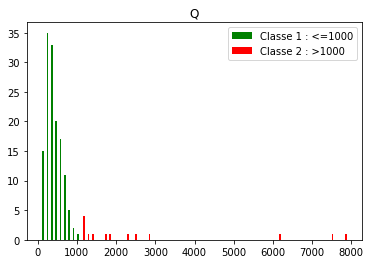

In [10]:
c1 = river_means_hydro[river_means_hydro['Q']<=1000]
c2 = river_means_hydro[river_means_hydro['Q']>1000]
plt.hist([c1['Q'],c2['Q']],bins=70,color=["green","red"],label=["Classe 1 : <=1000","Classe 2 : >1000"])
plt.legend()
plt.title("Q")
plt.show()

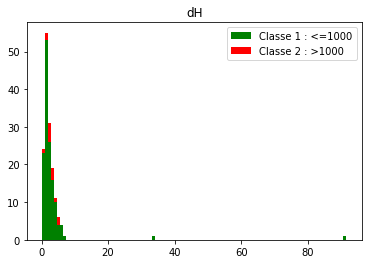

In [11]:
plt.hist([c1['dH'],c2['dH']],bins = 100, color=["green","red"],label=["Classe 1 : <=1000","Classe 2 : >1000"],histtype = 'barstacked')
plt.title("dH")
plt.legend()
plt.show()

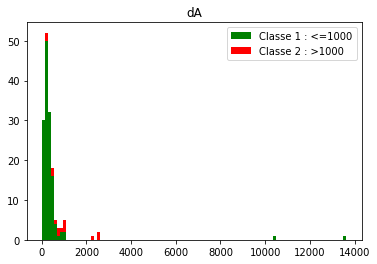

In [11]:
plt.hist([c1['dA'],c2['dA']],bins = 100, color=["green","red"],label=["Classe 1 : <=1000","Classe 2 : >1000"],histtype = 'barstacked')
plt.title("dA")
plt.legend()
plt.show()

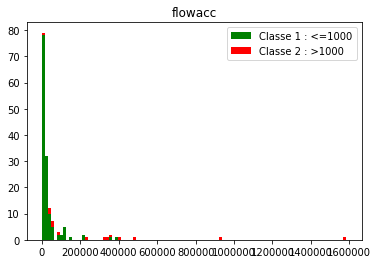

In [16]:
plt.hist([c1['flowacc'],c2['flowacc']],bins = 100, color=["green","red"],label=["Classe 1 : <=1000","Classe 2 : >1000"],histtype = 'barstacked')
plt.title("flowacc")
#plt.xlim(0,100000)
plt.legend()
plt.show()

### Test avec K-mean

**Principe :**

On détermine tout d'abord un nombre $k$ de classe . 
   1. Initialisation aléatoire des centres de classes
   2. On tire k individus qui sont affectés à la classe dont le centre est le plus proche au sens de la métrique euclidienne choisie. 
   3. Calcul du centre de gravité de chaque classe
   4. On répète 2. et 3. jusqu'à convergence de l'algorithme

Cela permet de maximiser la variance inter-classe et minimiser la variance intra-classe. 
 
(Métrique utilisée : métrique de Mahalanobis - inverse de la matrice variance-covariance)
### - Sur pepsi

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from matplotlib import colors
pca = PCA()

In [196]:
data_pepsi = data_pepsi.drop('river',axis=1)

In [197]:
pepsiR = pd.DataFrame(scale(data_pepsi), columns = data_pepsi.columns)
C = pca.fit(pepsiR).transform(pepsiR)

(556, 20)


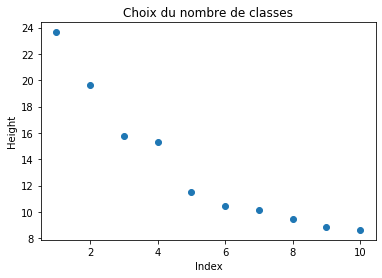

In [198]:
pepsiRech = pepsiR[::100] # Tirage d'un sous-échantillon des pixels
print(pepsiRech.shape)
Z = linkage(pepsiRech, method = 'complete', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(10) + 1

height = sorted(height, reverse = True)

plt.scatter(x,height[0:10]) 
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3B43C32C8>]],
      dtype=object)

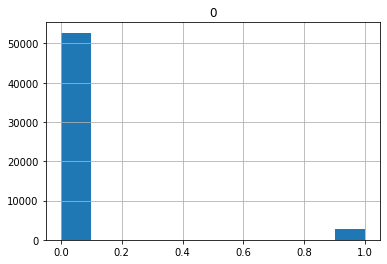

In [199]:
pepsiCP = C[:,0:6] # trois premières composantes
n_classes = 2 
kmeans = KMeans(n_clusters = n_classes, random_state = 0, n_jobs = -1).fit(pepsiCP)
kclassesACP = kmeans.labels_
# effectifs des classes
pd.DataFrame(kclassesACP).hist()

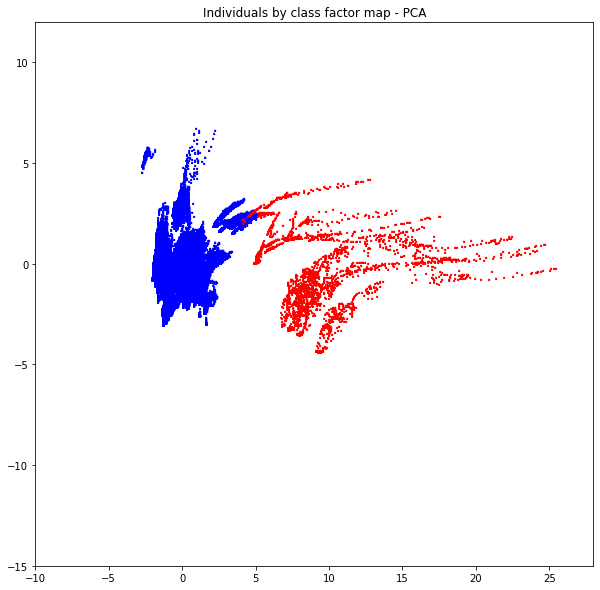

In [206]:
pc1 = C[:,0]
pc2 = C[:,1]s
coul = ['b', 'r', 'g', 'k', 'y','purple']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA')
plt.show()

In [202]:
c1 =[]
c2 = []
name1 = []
name2 = []
for i in range(0,len(pepsiR)): 
    if kclassesACP[i]==0: 
        c1.append(data_pepsi['Q'][i]) 
        
        name1.append(data_pepsi['river'][i]) 
    else: 
        c2.append(data_pepsi['Q'][i])
        name2.append(data_pepsi['river'][i]) 
        
        
        
c1 = np.array(c1)
c2 = np.array(c2)

In [203]:
d1 = pd.DataFrame(c1)
d2 = pd.DataFrame(c2)
display(d1.describe())
display(d2.describe())

,0
count,52718.000000
mean,1745.504662
std,3029.777336
min,7.156250
25%,214.231693
50%,702.265535
75%,1572.153691
max,27233.166957


,0
count,2807.000000
mean,27333.643150
std,23540.098052
min,-9610.285000
25%,10461.411667
50%,20174.221429
75%,39154.021429
max,112874.671429


In [204]:
display(np.unique(name1))
display(np.unique(name2))
print(np.any(np.unique(name1)=='Padma'))

array(['Connecticut', 'Cumberland', 'GaronneDownstream',
       'GaronneUpstream', 'IowaRiver', 'Jamuna', 'Kanawha', 'Kushiyara',
       'MississippiDownstream', 'MississippiUpstream',
       'MissouriDownstream', 'MissouriMidsection', 'MissouriUpstream',
       'Ohio', 'OhioSection1', 'OhioSection2', 'OhioSection3',
       'OhioSection4', 'OhioSection5', 'OhioSection7', 'OhioSection8',
       'Po', 'SacramentoDownstream', 'SacramentoUpstream', 'Seine',
       'SeineDownstream', 'SeineUpstream', 'Wabash'], dtype='<U21')

array(['Jamuna', 'MississippiDownstream', 'Padma'], dtype='<U21')

False


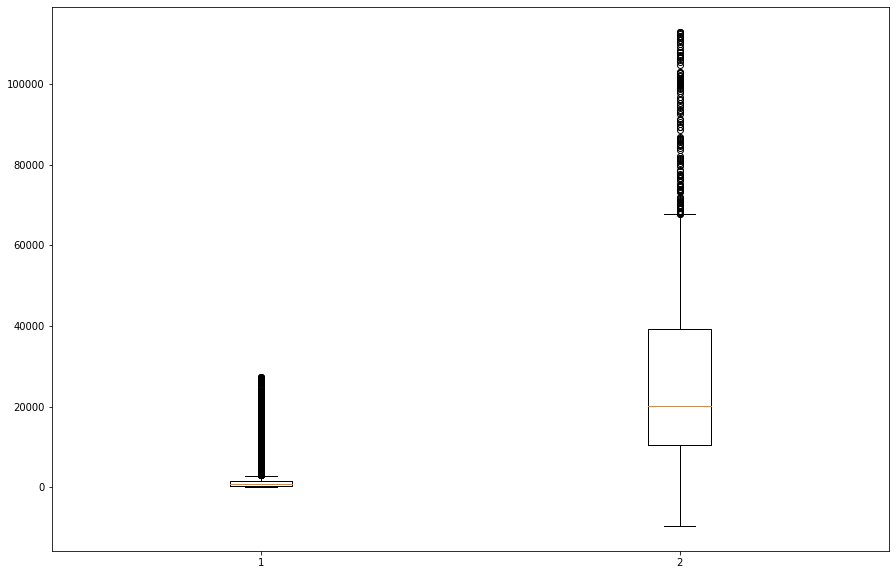

In [205]:
plt.figure(figsize =(15,10))
plt.boxplot((c1, c2), whis = 1)
plt.show()

### - Sur hydroswot

In [83]:
dat_hyd = data_hydro.drop(['site_no','station_name','river','stream_type'],axis=1)

In [156]:
display(data_hydro.station_name.unique())

array(['TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS',
       'ALABAMA RIVER NEAR MONTGOMERY, AL.',
       'COOSA RIVER AT CHILDERSBURG AL',
       'ALABAMA RIVER BEL CLAIB. L&D NR MONROEVILLE, AL.',
       'CONECUH RIVER AT STATE HWY 41 NEAR BREWTON, AL.',
       'MOBILE RIVER AT RIVER MILE 31.0 AT BUCKS, AL',
       'Arkansas River near Morrilton, AR', 'SNAKE RIVER AT WEISER ID',
       'SNAKE RIVER AT HELLS CANYON DAM ID-OR STATE LINE',
       'Red River at Index, AR', 'White River near Norfork, AR',
       'White River at Calico Rock, AR',
       'ARK RIVER HYDROPLANT AT TRIMBLE L&D NR VAN BUREN,',
       'Arkansas River at Dardanelle, AR',
       'Black River at Pocahontas, AR',
       'TOMBIGBEE R BL COFFEEVILLE L&D NEAR COFFEEVILLE',
       'COLORADO RIVER AT LEES FERRY, AZ',
       'COLORADO RIVER BELOW DAVIS DAM, AZ-NV',
       '  White River at Georgetown, AR',
       ' Arkansas River at Murray Dam near Little Rock, AR',
       'Black River at Black Rock, AR', ' White River 

In [84]:
dat_hyd.dropna(inplace=True)
dat_hyd.head()

,lon,lat,flowacc,stage,W,dH,dA,U,A0,Abar,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
1,-86.19,32.43,12033.084713,8.909304,152.0952,8.382000,1048.567348,1.405128,100.144012,256.363762,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,1486.634446
3,-86.19,32.43,12033.084713,2.752344,112.1664,2.225040,248.776690,0.472440,100.144012,256.363762,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,150.645624
4,-86.19,32.43,12033.084713,2.173224,120.3960,1.645920,180.287175,0.582168,100.144012,256.363762,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,140.168391
5,-86.19,32.43,12033.084713,6.446520,131.9784,5.919216,698.761390,1.152144,100.144012,256.363762,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,826.851920
6,-86.19,32.43,12033.084713,2.154936,117.3480,1.627632,178.113244,0.521208,100.144012,256.363762,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,137.903043


In [85]:
hydroR = pd.DataFrame(scale(dat_hyd), columns = dat_hyd.columns)
C = pca.fit(hydroR).transform(hydroR)

C:\Users\sbcas\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


(123, 37)


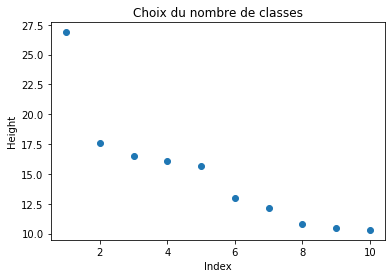

In [86]:
hydroRech = hydroR[::100] # Tirage d'un sous-échantillon des pixels
print(hydroRech.shape)
Z = linkage(hydroRech, method = 'complete', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(10) + 1

height = sorted(height, reverse = True)

plt.scatter(x,height[0:10]) 
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show()

(12205, 6)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3B2BB3E48>]],
      dtype=object)

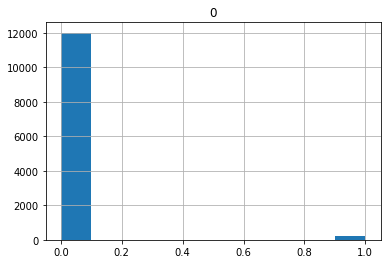

In [181]:
hydroCP = C[:,0:6] # trois premières composantes
print(np.shape(hydroCP))
n_classes = 2
kmeans_hydro = KMeans(n_clusters = n_classes, random_state = 0, n_jobs = -1).fit(hydroCP)
kclassesACP_hydro = kmeans_hydro.labels_
# effectifs des classes
pd.DataFrame(kclassesACP_hydro).hist()

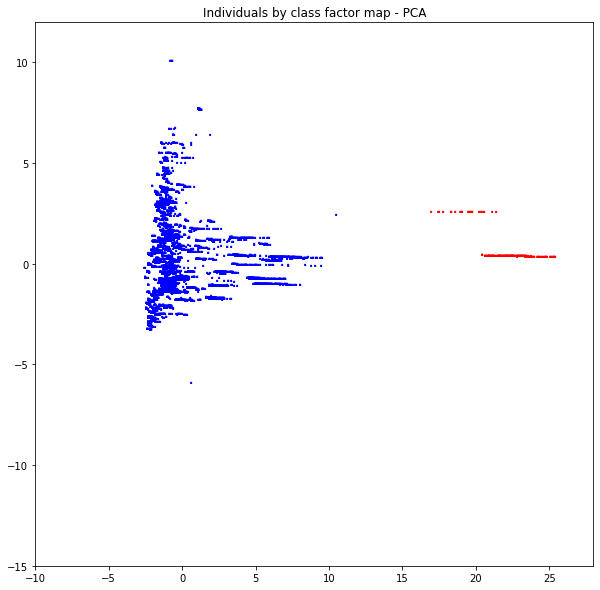

In [188]:
pc1 = C[:,0]
pc2 = C[:,1]
coul = ['b', 'r', 'g', 'k', 'y','purple']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_hydro):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA')
plt.show()

In [182]:
c1 =[]
c2 = []
name1 = []
name2 = []
j = 0
data_hydro.dropna(inplace = True )

for i in data_hydro.index: 
    if kclassesACP_hydro[j]==0: 
        c1.append(data_hydro['Q'][i]) 
        
        name1.append(data_hydro['river'][i]) 
    else: 
        c2.append(data_hydro['Q'][i])
        name2.append(data_hydro['river'][i]) 
    j+=1
        
        
c1 = np.array(c1)
c2 = np.array(c2)

In [183]:
print(np.unique(name1))
print(np.unique(name2))

['  White' ' Arkansas' ' White' 'ALABAMA' 'ALTAMAHA' 'ARK' 'ARKANSAS'
 'Allegheny' 'Androscoggin' 'Arkansas' 'Aroostook' 'Atchafalaya'
 'Auglaize' 'BIG BLACK' 'BIG SIOUX' 'BROAD' 'Bayou Anacoco' 'Beaver'
 'Bedias' 'Big Sioux' 'Black' 'Brazos' 'CAPE FEAR' 'CATAWBA'
 'CHATTAHOOCHEE' 'CHELAN' 'CHEMUNG' 'CHENANGO' 'CHIPPEWA' 'CLARK FORK'
 'CLEARWATER' 'COLORADO' 'CONECUH' 'CONGAREE' 'CONNECTICUT' 'COOSA'
 'CUMBERLAND' 'Calcasieu' 'Canadian' 'Cedar' 'Clark Fork' 'Cypress'
 'DELAWARE' 'Deep Fork' 'Delaware' 'Des Moines' 'EAST FORK WHITE' 'FLINT'
 'FLOODWAY AT ARKANSAS' 'FOX' 'FRENCH BROAD' 'Flathead' 'G Miami'
 'GENESEE' 'GREEN' 'GREENBRIER' 'Great Miami' 'HARPETH' 'HIWASSEE'
 'HUDSON' 'ILLINOIS' 'Illinois' 'Iowa' 'JAMES' 'Juniata' 'KANAWHA'
 'KANSAS' 'KENTUCKY' 'KOOTENAI' 'Kennebec' 'Kootenai' 'LITTLE' 'Lehigh'
 'Llano' 'MARMATON' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MOBILE'
 'Maquoketa' 'Maumee' 'Mill' 'Mississippi' 'Missouri' 'Muskingum'
 'NAMAKAN' 'NEOSHO' 'NEW' 'NOTTOWAY' 'Navasota' 'N

In [184]:
pareil = []
for i in np.unique(name1):
    for j in np.unique(name2):
        if i == j: 
            pareil.append(i)
            break
            
paspareil =[]
for i in np.unique(name1):
    if not i in np.unique(name2):
        paspareil.append(i)


**Question** " White", "White" et "  White" est la même rivière? Pareil pour "ARKANSAS", "Arkansas", " Arkansas"? 

In [185]:
d1 = pd.DataFrame(c1)
d2 = pd.DataFrame(c2)
display(d1.describe())
display(d2.describe())

,0
count,12010.000000
mean,1248.474603
std,2298.165221
min,100.241637
25%,224.835762
50%,508.845521
75%,1138.264742
max,28883.183524


,0
count,195.000000
mean,18474.697434
std,9086.391501
min,4316.623776
25%,11355.055483
50%,17170.815310
75%,24115.885666
max,40661.082301


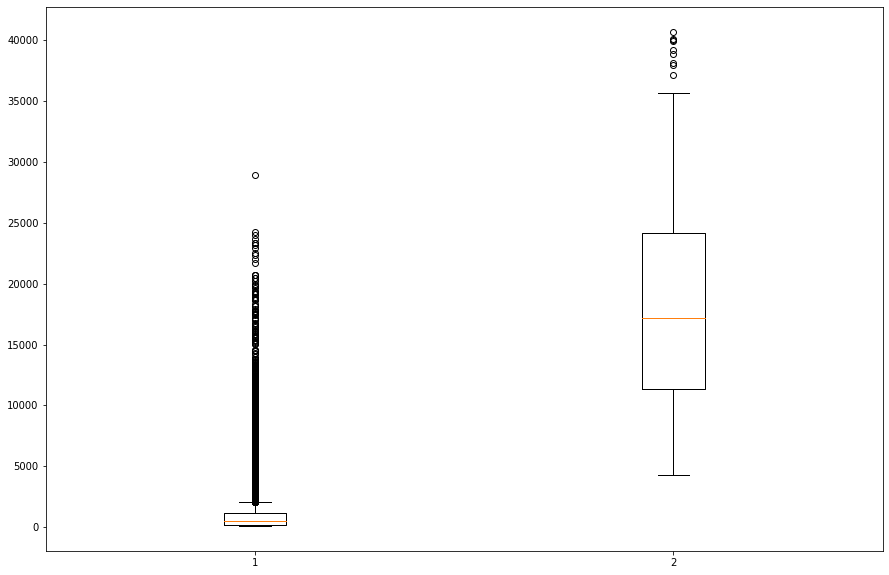

In [187]:
plt.figure(figsize =(15,10))
plt.boxplot((c1, c2), whis = 1)
plt.show()